<a href="https://colab.research.google.com/github/Hasan132002/AI/blob/main/SentiMent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
data = {
    'text': [
        'I love this product, it works great!',
        'This product is terrible, do not buy it.'
    ],
    'label': [
        'positive', 'negative'
    ]
}


In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
def process_txt(text):
  words = word_tokenize(text.lower())
  filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
  return ''.join(filtered_words)

In [96]:
df=pd.DataFrame(data)

In [97]:
#feature extraction using tf-idf
X=df['text']
Y=df['label']
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [98]:
#model training
model = RandomForestClassifier()
model.fit(X_tfidf,Y)


RandomForestClassifier()

In [102]:
#user input for sentiment analysis
user_input=input("Enter a Sentence :")
preprocessed_text = process_txt(user_input)
input_tfidf = vectorizer.transform([preprocessed_text])
predict_sentiment = model.predict(input_tfidf)[0]
print('Predicted Sentiment : ',predict_sentiment)

Enter a Sentence :love
Predicted Sentiment :  positive


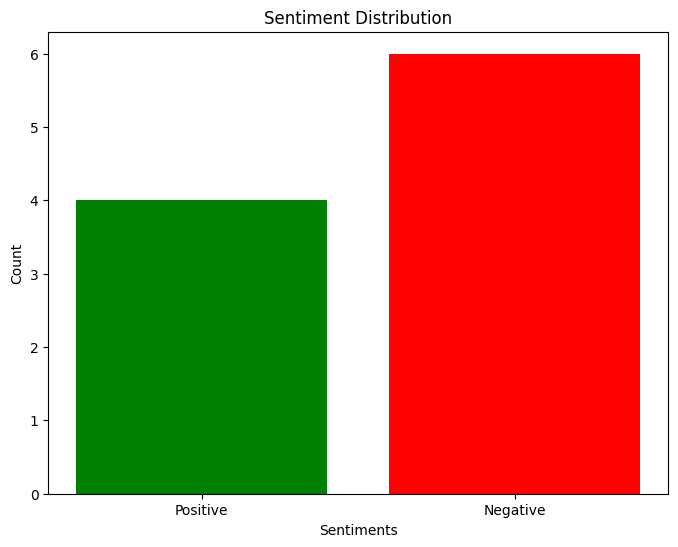

In [108]:
import matplotlib.pyplot as plt
data = {
    'text': [
        'I love this product, it works great!',
        'This product is terrible, do not buy it.',
        'Best product ever, highly recommended.',
        'Waste of money, very disappointed.',
        'The quality of this product is amazing!',
        'I regret buying this product, it does not work as expected.',
        'Absolutely fantastic product, exceeded my expectations.',
        'This product is overpriced and not worth it.',
        "I'm satisfied with my purchase, great value for money.",
        "I wouldn't recommend this product, it broke after a few uses."
    ],
    'label': [
        'negative', 'negative', 'positive', 'negative', 'positive',
        'negative', 'positive', 'negative', 'positive', 'negative'
    ]
}
postive_count =data['label'].count('positive')
negative_count= data['label'].count('negative')
plt.figure(figsize=(8,6))
plt.bar(['Positive','Negative'],[postive_count,negative_count],color=['green','red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()